In [1]:
# https://stackoverflow.com/questions/4383571/importing-files-from-different-folder
import sys
sys.path.insert(1, '../../python_scripts')
from fourier import *

# Test DFT and IDFT

We take a simple signal $f$ and we apply a Discrete Fourier Transform (**DFT**) to retrieve its frequencies. We then use the Inverse Discrete Fourier Transform (**IDFT**) to recompose the signal from its frequencies.

## The signal

In [2]:
def rect(t):
    if np.abs(t) > 1/2:
        return 0
    elif np.abs(t) == 1/2:
        return 1/2
    else:
        return 1

func = rect

In [3]:
# Arguments
dt = .01 # dt : sample spacing 
N = 2500 # sample size (N/2 is the number the positive frequencies)

x, T = construct_discrete_signal_centered_at_0(dt, N, func)

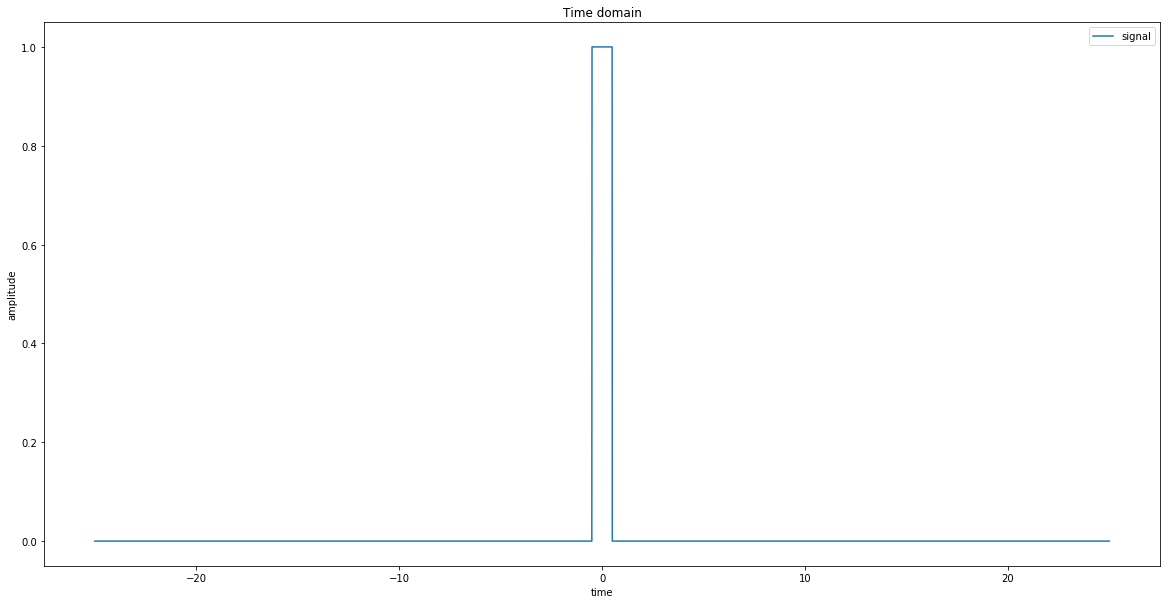

In [4]:
# Arguments
Xs = [T]
L = [x]
Labels = ["signal"]
title = "Time domain"
xLabel = "time"
yLabel = "amplitude"

plot_signals(Xs, L, Labels, title, xLabel, yLabel)

## DFT

https://en.wikipedia.org/wiki/funcangular_function#Fourier_transform_of_the_funcangular_function

We use the DFT to get the amplitudes associated to the frequencies.

**Remark**:
a normalization is necessary before getting the true amplitudes.

In [5]:
X_noshift, Xi, X = retrieve_frequencies(x, N, dt)
X = X/(2*N)

In [6]:
np.amax( np.abs( np.imag(X) ) )

0.00020000000000000099

In [7]:
C = get_cn(N, dt, Xi, func, T)

/usr/lib/python3/dist-packages/scipy/integrate/quadpack.py:448: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagse(func,a,b,args,full_output,epsabs,epsrel,limit)
/usr/lib/python3/dist-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
/usr/lib/python3/dist-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


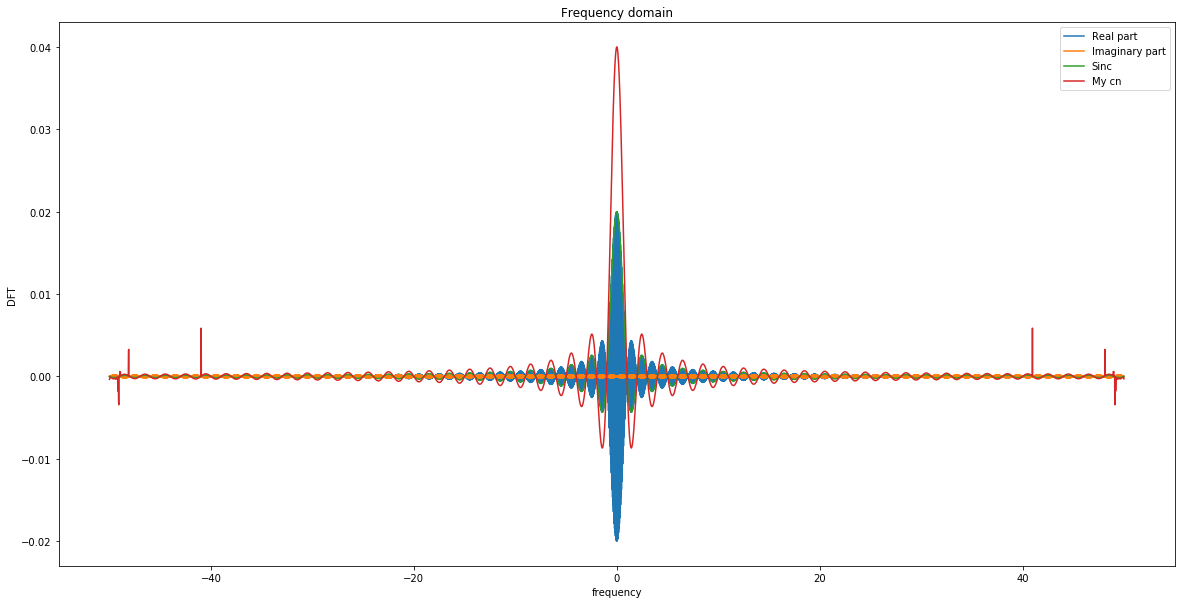

In [8]:
# Arguments
Xs = [Xi, Xi, Xi, Xi]
L = [np.real(X), np.imag(X), 1/(2*N*dt)*np.sinc(Xi), C]
Labels = ["Real part", "Imaginary part", "Sinc", "My cn"]
title = "Frequency domain"
xLabel = "frequency"
yLabel = "DFT"

plot_signals(Xs, L, Labels, title, xLabel, yLabel)

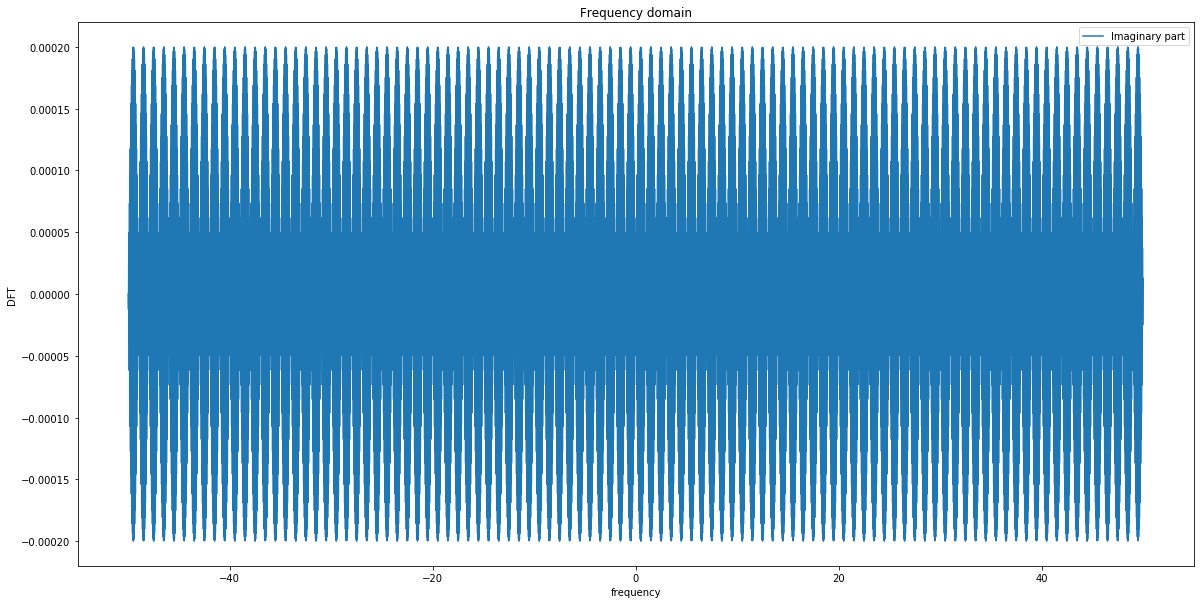

In [9]:
# Arguments
Xs = [Xi]
L = [np.imag(X)]
Labels = ["Imaginary part"]
title = "Frequency domain"
xLabel = "frequency"
yLabel = "DFT"

plot_signals(Xs, L, Labels, title, xLabel, yLabel)

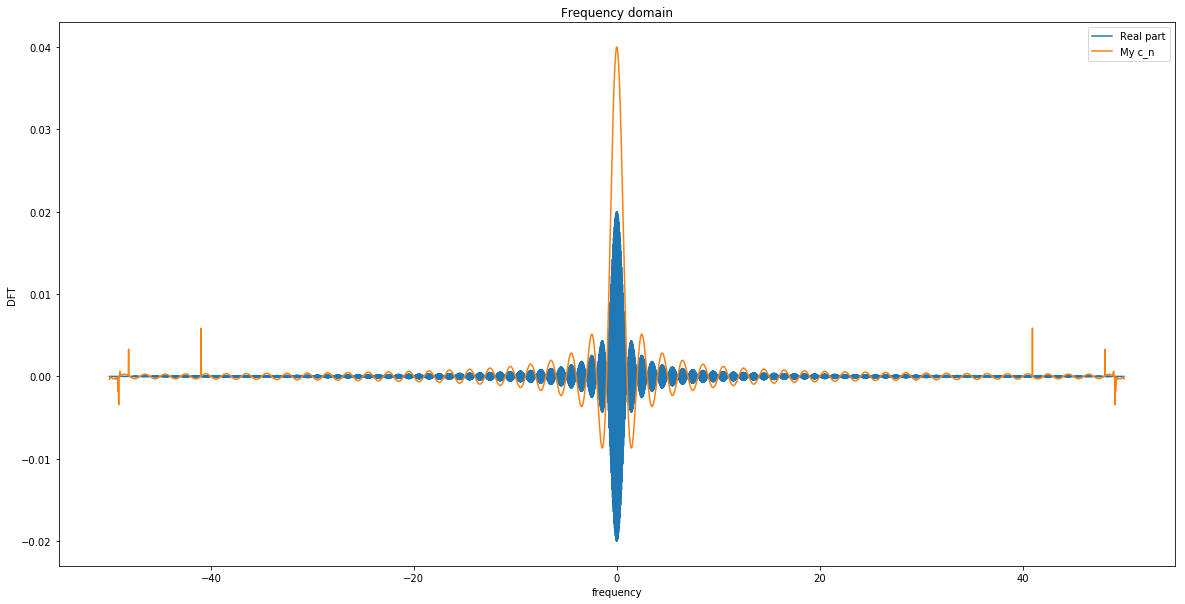

In [10]:
# Arguments
Xs = [Xi, Xi]
L = [np.real(X), C]
Labels = ["Real part", "My c_n"]
title = "Frequency domain"
xLabel = "frequency"
yLabel = "DFT"

plot_signals(Xs, L, Labels, title, xLabel, yLabel)

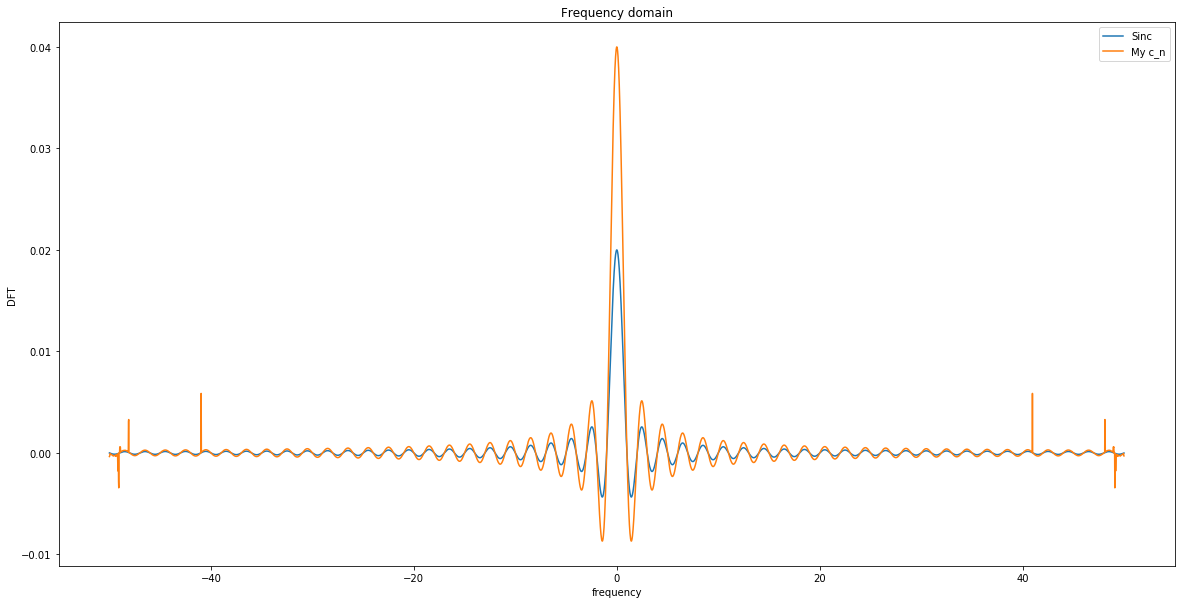

In [11]:
# Arguments
Xs = [Xi, Xi]
L = [1/(2*N*dt)*np.sinc(Xi), C]
Labels = ["Sinc", "My c_n"]
title = "Frequency domain"
xLabel = "frequency"
yLabel = "DFT"

plot_signals(Xs, L, Labels, title, xLabel, yLabel)

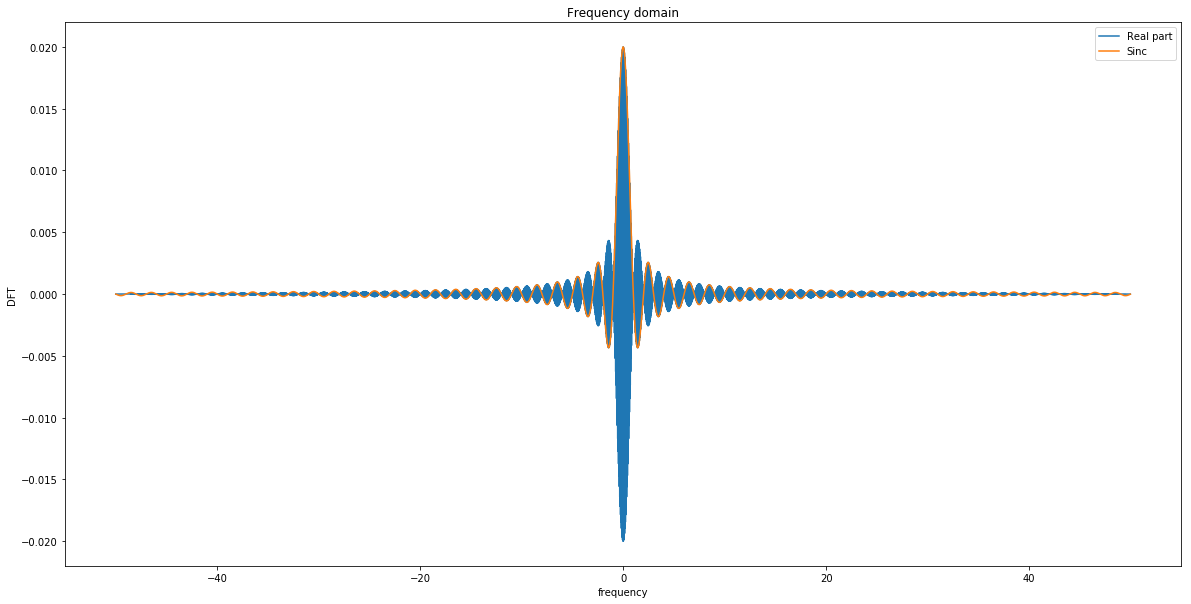

In [12]:
# Arguments
Xs = [Xi, Xi]
L = [np.real(X), 1/(2*N*dt)*np.sinc(Xi)]
Labels = ["Real part", "Sinc"]
title = "Frequency domain"
xLabel = "frequency"
yLabel = "DFT"

plot_signals(Xs, L, Labels, title, xLabel, yLabel)